<a href="https://colab.research.google.com/github/Phani-ISB/MLSL-1/blob/main/tmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

### Importing DataSet

In [13]:
url = "https://media.githubusercontent.com/media/Phani-ISB/MLSL-1/refs/heads/main/tmnst_Dataset.csv"
df = pd.read_csv(url)

In [14]:
df.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,J,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df["labels"]

,labels
0,D
1,F
2,J
3,H
4,A
...,...
74719,U
74720,R
74721,N
74722,J


### Normalizing Pixels

In [16]:
# Drop labels column to ensure only pixels stay
labels = df["labels"]
pixels = df.drop("labels", axis=1)

In [17]:
# Normalize pixel values to range [0, 1]
pixels_normalized = pixels / 255.0

# Combine labels back with normalized pixels
df_norm = pd.concat([labels, pixels_normalized], axis=1)

In [18]:
print("Normalised dataFrame  : \n", df_norm)

Normalised dataFrame  : 
       labels    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0          D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1          F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2          J  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3          H  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4          A  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
74719      U  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
74720      R  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
74721      N  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
74722      J  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
74723      I  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

 

### Splitting Dataset

In [19]:
#Seperating labels and normalized pixels
X = df_norm.drop("labels", axis=1)
y = df_norm["labels"]

In [20]:
# Stratified spliiting by Class (70% Train, 30% Test sets)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y,test_size = 0.3,
                                                     stratify = y,
                                                     random_state=42)

In [21]:
#Combining and creating training and test dataframes
train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

# Problem.1 PCA vs Fisher

In [22]:
# Importing libraries from scikit learn for PCA (Unsupervised) & Fisher (Supervised)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mpl_toolkits.mplot3d import Axes3D

In [26]:
# Creating a function for PCA & FDA

def pca_vs_fisher_3d(df, classes):
    # Filter the dataframe for the specified classes
    df_class = df[df['labels'].isin(classes)]
    X = df_class.drop('labels', axis=1).values
    y = df_class['labels'].values

    # PCA Transformation
    df_pca = PCA(n_components=3).fit_transform(X)

    # FDA Transformation
    n_fisher = len(classes) - 1
    df_fda = LDA(n_components=n_fisher).fit_transform(X, y)
    if n_fisher < 3:
        # Pad with zeros to have 3 components for 3D plotting
        df_fda = np.hstack([df_fda, np.zeros((df_fda.shape[0], 3 - n_fisher))])

    # Set up the figure and 3D subplots
    fig = plt.figure(figsize=(12, 5))
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')

    colors = ['red', 'green', 'blue', 'cyan']
    for cls, col in zip(classes, colors):
        mask = (y == cls)
        ax1.scatter(df_pca[mask, 0], df_pca[mask, 1], df_pca[mask, 2],
                    color=col, label=cls, s=40, alpha=0.7)
        ax2.scatter(df_fda[mask, 0], df_fda[mask, 1], df_fda[mask, 2],
                    color=col, label=cls, s=40, alpha=0.7)

    # Set titles and labels
    ax1.set_title("PCA 3D")
    ax1.set_xlabel("PCA1")
    ax1.set_ylabel("PCA2")
    ax1.set_zlabel("PCA3")
    ax1.legend()

    ax2.set_title("FDA 3D")
    ax2.set_xlabel("FDA1")
    ax2.set_ylabel("FDA2")
    ax2.set_zlabel("FDA3")
    ax2.legend()

    plt.tight_layout()
    plt.show()

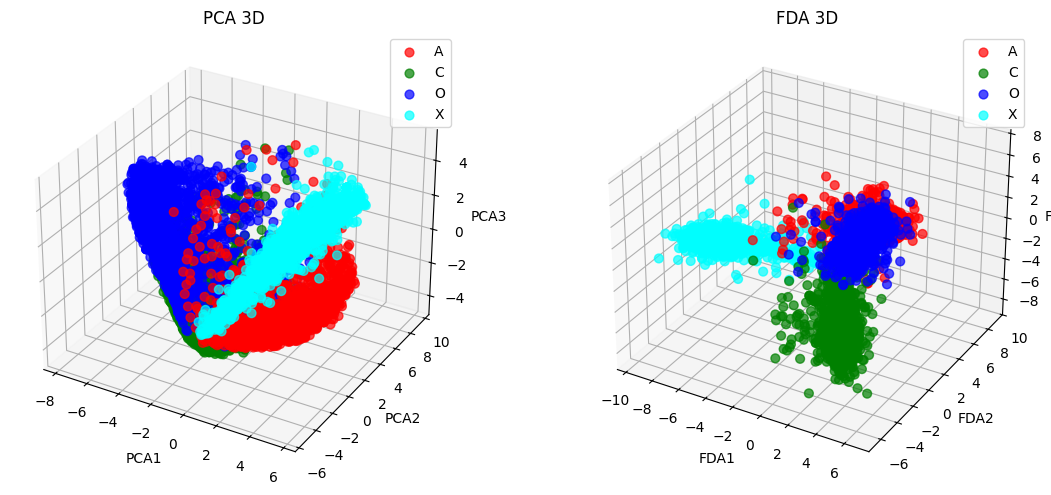

In [27]:
# Observing the output with 4 classes ['A','C','O','X']

classes = ['A','C','O','X']

pca_vs_fisher_3d(train_df,classes)

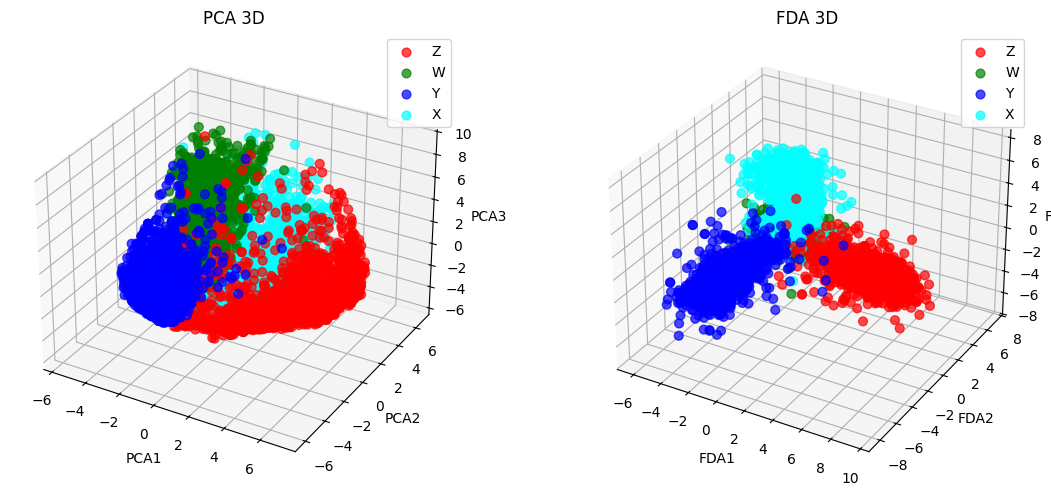

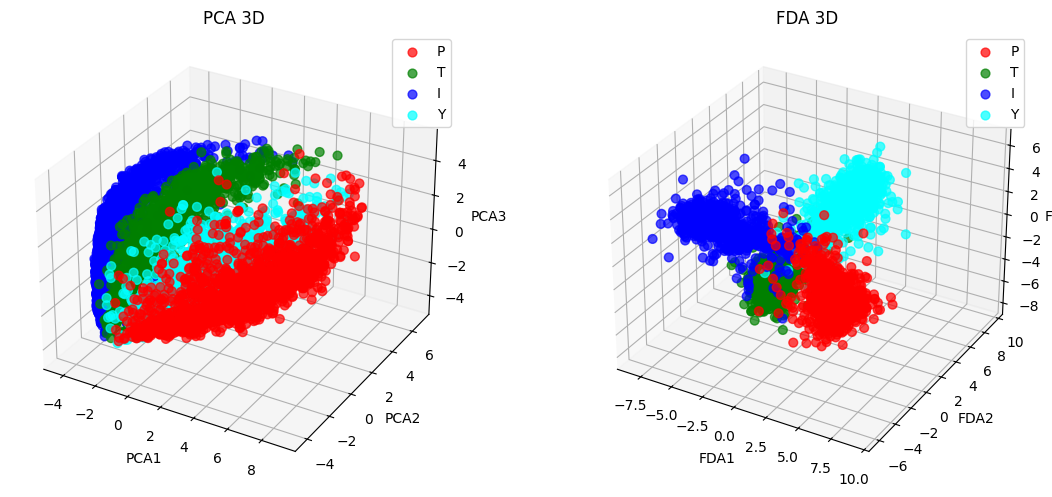

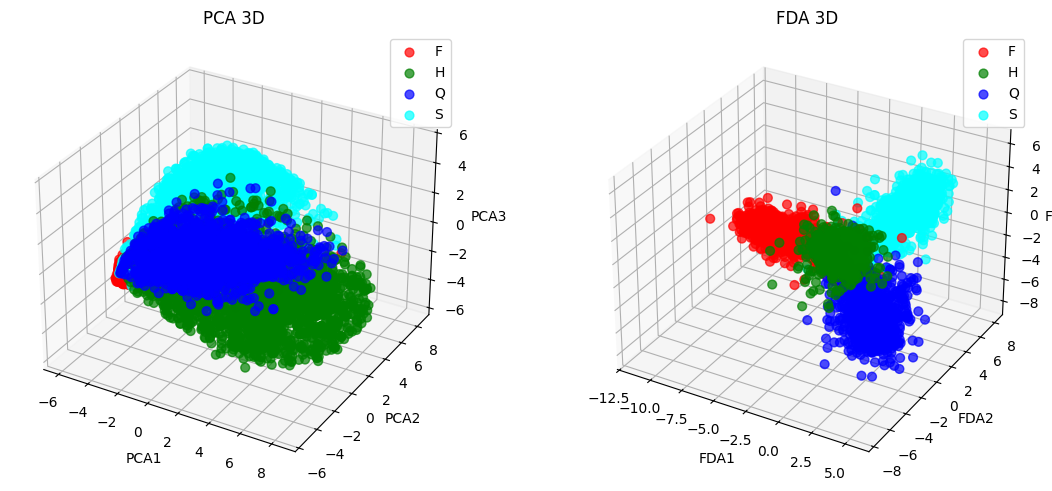

In [28]:
# Observing the output with 3 more sets of different 4 classes

class_1 = ['Z','W','Y','X']
class_2 = ['P','T','I','Y']
class_3 = ['F','H','Q','S']

pca_vs_fisher_3d(train_df,class_1)
pca_vs_fisher_3d(train_df,class_2)
pca_vs_fisher_3d(train_df,class_3)